In [17]:
!pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.2 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/8.1 MB 5.2 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 5.1 MB/s eta 0:00:01
   -------------------- ------------------- 4.2/8.1 MB 5.2 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 5.2 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.1 MB 5.2 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.1 MB/s  0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------------------ --------------------- 1.0/2.3 MB 5.2 MB/s eta 0:00:0

In [6]:
!pip install numpy

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.8 MB 5.3 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.8 MB 5.3 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/12.8 MB 5.3 MB/s eta 0:00:02
   ------------- -------------------------- 4.2/12.8 MB 5.3 MB/s eta 0:00:02
   ---------------- ----------------------- 5.2/12.8 MB 5.3 MB/s eta 0:00:02
   ------------------- -------------------- 6.3/12.8 MB 5.3 MB/s eta 0:00:02
   ---------------------- ----------------- 7.3/12.8 MB 5.3 MB/s eta 0:00:02
   --------------------------- ------------ 8.7/12.8 MB 5.3 MB/s eta 0:00:01
   ------------------------------ --------- 9.7/12.8 MB 5.3 MB/s eta 0:00:01
   --------------------------------- ------ 10.7/12.8 MB 5.3 MB/s eta 0:00:01
   ------------------------------------ --- 11.8/12.8 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 12.8/12.8 MB 5.3 MB/s  0:00:02


hind1 and hind2 are integer arrays that store the row and column indices of the nonzero entries in the sparse Hamiltonian matrix.
•	ham2[i] is the value of the i-th nonzero entry in the Hamiltonian.
•	hind1[i] is the row index of that entry.
•	hind2[i] is the column index of that entry.

In [4]:
import numpy as np

# Example: opening a text file in read mode
file_path = r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\ED\TFIM1Ham.txt"

with open(file_path, "r") as f:
    data = f.read()

# Load with correct dtype
data = np.loadtxt(file_path, dtype=float)

# Separate into row, col, val
rows = data[:,0].astype(int)   # convert to 0-based
cols = data[:,1].astype(int)
vals = data[:,2]

# print("data:", data)
# print("rows:", rows)
# print("columns:", cols)
# Matrix size (assuming square)
phys_N = 10           # number of spins
dim = 2**phys_N      # Hilbert space dimension

M = np.zeros((dim, dim))
M[rows, cols] = vals

print("Matrix shape:", M.shape)

# (Optional) enforce exact Hermiticity if there are tiny asymmetries from IO
# M = 0.5 * (M + M.T.conj())

np.set_printoptions(precision=3, suppress=True)  # 3 decimals, no scientific notation
# print(M)
spectra = []
gaps = []

# Diagonalize with numpy (returns all eigenvalues)
evals, evecs = np.linalg.eigh(M)

# Sort eigenvalues (np.linalg.eigh usually gives them sorted already, but let's be safe)
evals = np.sort(evals)

# Take the lowest 4 eigenvalues
lowest_4 = evals[:4]

spectra.append(lowest_4)
gaps.append(lowest_4[2] - lowest_4[0])   # gap = E2 - E0

print("Lowest 4 eigenvalues:", lowest_4)
print("Gap (E2 - E0):", gaps[-1])


Matrix shape: (1024, 1024)
Lowest 4 eigenvalues: [-4.009 -3.102 -3.084 -3.056]
Gap (E2 - E0): 0.9251007566133453


In [5]:
import numpy as np
import os
ns=2
def compute_gap(index, phys_N=ns, base_path=r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\ED"):
    """
    Compute the spectral gap (E2 - E0) for TFIM Hamiltonian with given index.

    Parameters
    ----------
    index : int
        File index, e.g. 1 -> TFIM1Ham.txt
    phys_N : int
        Number of spins in the system (default=6)
    base_path : str
        Path to directory containing TFIM*.txt files

    Returns
    -------
    gap : float
        Energy gap (E2 - E0)
    lowest_4 : np.ndarray
        The lowest 4 eigenvalues
    """
    file_path = os.path.join(base_path, f"TFIM{index}Ham.txt")

    # Load data (row, col, val)
    data = np.loadtxt(file_path, dtype=float)
    rows = data[:,0].astype(int)
    cols = data[:,1].astype(int)
    vals = data[:,2]

    # Hilbert space dimension
    dim = 2**phys_N
    M = np.zeros((dim, dim))
    M[rows, cols] = vals

    # Diagonalize
    evals, evecs = np.linalg.eigh(M)
    evals = np.sort(evals)
    lowest_4 = evals[:6]

    gap = lowest_4[2] - lowest_4[0]
    return gap, lowest_4, M, evecs

# Example: loop over multiple files
# for idx in range(0, 1):  # TFIM1Ham.txt, TFIM2Ham.txt, TFIM3Ham.txt
#     gap, lowest_4, M, evecs = compute_gap(idx, phys_N=ns)
#     print(idx)
#     print(f"TFIM{idx}Ham: gap = {gap:.6f}, lowest 4 eigenvalues = {lowest_4}")

print(M)

[[0.35 0.5  0.5  ... 0.   0.   0.  ]
 [0.5  0.25 0.   ... 0.   0.   0.  ]
 [0.5  0.   0.15 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


In [6]:
evals, evecs = np.linalg.eigh(M)
# # print(evals)
# # print(evecs)
idxs = np.argsort(evals)
lowest_evals = evals[idxs][:4]
lowest_vecs = evecs[:, idxs][:, :4]   # take first 4 eigenvectors
# print(lowest_evals)
# print(lowest_vecs)

def state_to_distribution(state, n_qubits, cutoff=0.0):
    """
    Return computational basis states with probability > cutoff.
    """
    state = np.array(state).flatten()
    probs = np.abs(state)**2
    dist = {}
    for i, p in enumerate(probs):
        if p > cutoff:
            dist[format(i, f'0{n_qubits}b')] = float(p)
    return dist

for i in range(4):
    print(f"Eigenvalue {lowest_evals[i]:.3f} -> {state_to_distribution(lowest_vecs[:, i], ns)}")


Eigenvalue -4.009 -> {'00': 0.002748773335730947, '01': 0.0030305226033968853, '10': 0.003349111016172099, '11': 0.0030233113590579356, '100': 0.003340763498829826, '101': 0.0037016213295412484, '110': 0.0033327941736106706, '111': 0.003023671835045214, '1000': 0.0033411837569789706, '1001': 0.00368271286590241, '1010': 0.004091261834123168, '1011': 0.0036923676544360832, '1100': 0.003324885739092977, '1101': 0.0036831300089264357, '1110': 0.0033336222367452064, '1111': 0.003023647735450748, '10000': 0.0033411837569789675, '10001': 0.0036837148142202037, '10010': 0.004069863748491319, '10011': 0.003674006997159809, '10100': 0.004081067091326797, '10101': 0.004521957646062224, '10110': 0.004070338752126168, '10111': 0.003692865516853926, '11000': 0.0033253049957256875, '11001': 0.0036652683413720844, '11010': 0.004070825343674151, '11011': 0.00367397881723012, '11100': 0.0033257128774107545, '11101': 0.0036841038866096128, '11110': 0.0033335946381075686, '11111': 0.0030236718350452087, 

In [89]:
print(ns)
print(1/np.sqrt(2**10))

8
0.03125


In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

indices = range(1, 21)   # TFIM1Ham .. TFIM10Ham
gaps = []
spectra = []   # to store lowest eigenvalues

for idx in indices:
    gap, lowest_4, _ ,_= compute_gap(idx, phys_N=ns)
    gaps.append(gap)
    spectra.append(lowest_4)   # save the spectrum

parameter = np.array(indices) /20
spectra = np.array(spectra)   # shape: (num_indices, 4)


plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "lines.linewidth": 2,
    "lines.markersize": 5,
})


fig, axes = plt.subplots(1, 2, figsize=(12,4))  # 1 row, 2 columns

# --- Left panel: gap ---
ax = axes[0]
ax.plot(parameter, gaps, marker="o", linestyle="-", color="C0")
ax.axvline(x=0.5, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{short}}=0.5$")
ax.set_xlabel(r"$J_{\mathrm{short}}$")
ax.set_ylabel(r"Gap $E_1 - E_0$")
ax.set_title(r"Spectral gap (TFIM with $B=0.5, N=8$)")
ax.legend(frameon=False, loc="best")
ax.grid(True, alpha=0.3)

ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

# --- Right panel: spectrum ---
ax = axes[1]
for i in range(spectra.shape[1]):
    ax.plot(parameter, spectra[:, i], marker="o", linestyle="-", label=rf"$E_{i}$")
ax.axvline(x=0.5, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{short}}=0.5$")
ax.set_xlabel(r"$J_{\mathrm{short}}$")
ax.set_ylabel("Energy")
ax.set_title(r"Lowest 6 eigenvalues (TFIM with $B=0.5, N=8$)")
ax.legend(frameon=False, loc="best")
ax.grid(True, alpha=0.3)

ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

plt.tight_layout()
plt.savefig("TFIM_combined12.pdf")   # save both panels into one PDF
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

In [8]:
import numpy as np
import os
ns=10
def compute_gap(index, phys_N=ns, base_path=r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\ED"):
    """
    Compute the spectral gap (E2 - E0) for TFIM Hamiltonian with given index.

    Parameters
    ----------
    index : int
        File index, e.g. 1 -> TFIM1Ham.txt
    phys_N : int
        Number of spins in the system (default=6)
    base_path : str
        Path to directory containing TFIM*.txt files

    Returns
    -------
    gap : float
        Energy gap (E2 - E0)
    lowest_4 : np.ndarray
        The lowest 4 eigenvalues
    """
    file_path = os.path.join(base_path, f"LFIMLRa0{index}Ham.txt")

    # Load data (row, col, val)
    data = np.loadtxt(file_path, dtype=float)
    rows = data[:,0].astype(int)
    cols = data[:,1].astype(int)
    vals = data[:,2]

    # Hilbert space dimension
    dim = 2**phys_N
    M = np.zeros((dim, dim))
    M[rows, cols] = vals

    # Diagonalize
    evals, _ = np.linalg.eigh(M)
    evals = np.sort(evals)
    lowest_4 = evals[:6]

    gap = lowest_4[1] - lowest_4[0]
    return gap, lowest_4

# Example: loop over multiple files
# for idx in range(1, 51):  # TFIM1Ham.txt, TFIM2Ham.txt, TFIM3Ham.txt
#     gap, lowest_4 = compute_gap(idx, phys_N=ns)
#     print(f"LFIMLRa0{idx}Ham: gap = {gap:.6f}, lowest 4 eigenvalues = {lowest_4}")



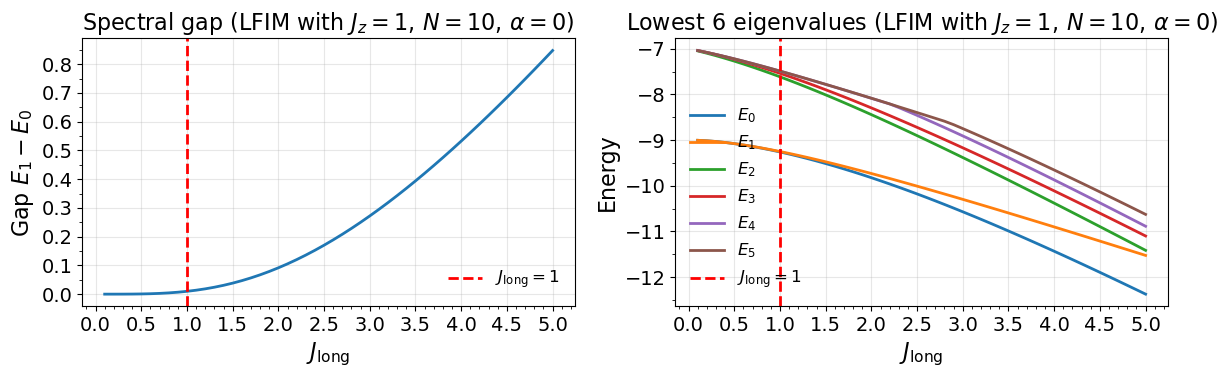

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

indices = range(1, 51)   # TFIM1Ham .. TFIM10Ham
gaps = []
spectra = []   # to store lowest eigenvalues

for idx in indices:
    gap, lowest_4 = compute_gap(idx, phys_N=10)
    gaps.append(gap)
    spectra.append(lowest_4)   # save the spectrum

parameter = np.array(indices) / 10
spectra = np.array(spectra)   # shape: (num_indices, 4)


plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "lines.linewidth": 2,
    "lines.markersize": 5,
})

fig, axes = plt.subplots(1, 2, figsize=(12,4))  # 1 row, 2 columns

# --- Left panel: gap ---
ax = axes[0]
ax.plot(parameter, gaps, linestyle="-", color="C0")
ax.axvline(x=1, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{long}}=1$")
ax.set_xlabel(r"$J_{\mathrm{long}}$")
ax.set_ylabel(r"Gap $E_1 - E_0$")
ax.set_title(r"Spectral gap (LFIM with $J_z=1, \, N=10, \, \alpha=0$)")
ax.legend(frameon=False, loc="best")
ax.grid(True, alpha=0.3)

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

# --- Right panel: spectrum ---
ax = axes[1]
for i in range(spectra.shape[1]):
    ax.plot(parameter, spectra[:, i], linestyle="-", label=rf"$E_{i}$")
ax.axvline(x=1, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{long}}=1$")
ax.set_xlabel(r"$J_{\mathrm{long}}$")
ax.set_ylabel("Energy")
ax.set_title(r"Lowest 6 eigenvalues (LFIM with $J_z=1, \, N=10, \, \alpha=0$)")
ax.legend(frameon=False, loc="best")
ax.grid(True, alpha=0.3)

ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

plt.tight_layout()
plt.savefig("LFIMa0_combined.pdf")   # save as one PDF
plt.show()



In [107]:
import numpy as np
import os
ns=10
def compute_gap(index, phys_N=ns, base_path=r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\ED"):
    """
    Compute the spectral gap (E2 - E0) for TFIM Hamiltonian with given index.

    Parameters
    ----------
    index : int
        File index, e.g. 1 -> TFIM1Ham.txt
    phys_N : int
        Number of spins in the system (default=6)
    base_path : str
        Path to directory containing TFIM*.txt files

    Returns
    -------
    gap : float
        Energy gap (E2 - E0)
    lowest_4 : np.ndarray
        The lowest 4 eigenvalues
    """
    file_path = os.path.join(base_path, f"LFIMLRa05{index}Ham.txt")

    # Load data (row, col, val)
    data = np.loadtxt(file_path, dtype=float)
    rows = data[:,0].astype(int)
    cols = data[:,1].astype(int)
    vals = data[:,2]

    # Hilbert space dimension
    dim = 2**phys_N
    M = np.zeros((dim, dim))
    M[rows, cols] = vals

    # Diagonalize
    evals, _ = np.linalg.eigh(M)
    evals = np.sort(evals)
    lowest_4 = evals[:6]

    gap = lowest_4[1] - lowest_4[0]
    return gap, lowest_4

# Example: loop over multiple files
# for idx in range(1, 51):  # TFIM1Ham.txt, TFIM2Ham.txt, TFIM3Ham.txt
#     gap, lowest_4 = compute_gap(idx, phys_N=ns)
#     print(f"LFIMLRa05{idx}Ham: gap = {gap:.6f}, lowest 4 eigenvalues = {lowest_4}")



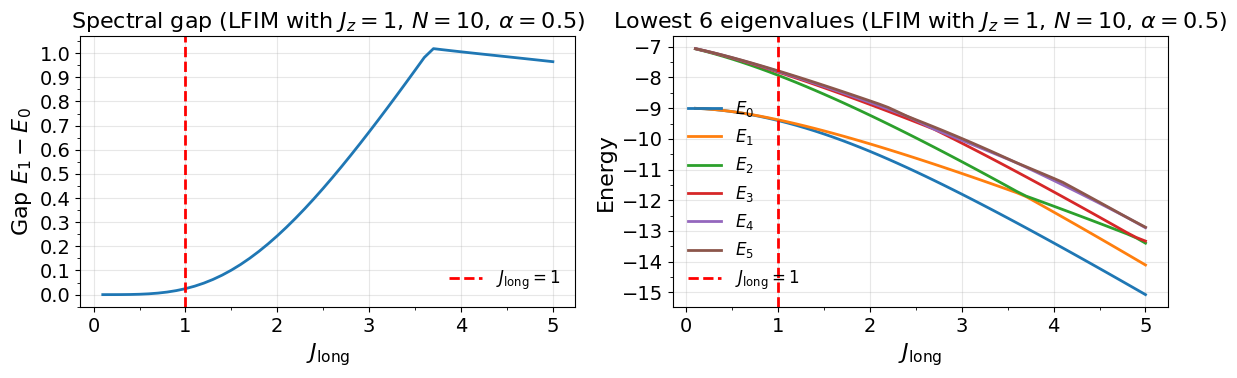

In [108]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

indices = range(1, 51)   # TFIM1Ham .. TFIM10Ham
gaps = []
spectra = []   # to store lowest eigenvalues

for idx in indices:
    gap, lowest_4 = compute_gap(idx, phys_N=10)
    gaps.append(gap)
    spectra.append(lowest_4)   # save the spectrum

parameter = np.array(indices) / 10
spectra = np.array(spectra)   # shape: (num_indices, 4)


plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "lines.linewidth": 2,
    "lines.markersize": 5,
})

fig, axes = plt.subplots(1, 2, figsize=(12,4))  # 1 row, 2 columns

# --- Left panel: gap ---
ax = axes[0]
ax.plot(parameter, gaps, linestyle="-", color="C0")
ax.axvline(x=1, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{long}}=1$")
ax.set_xlabel(r"$J_{\mathrm{long}}$")
ax.set_ylabel(r"Gap $E_1 - E_0$")
ax.set_title(r"Spectral gap (LFIM with $J_z=1, \, N=10, \, \alpha=0.5$)")
ax.legend(frameon=False, loc="best")
ax.grid(True, alpha=0.3)

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))

# --- Right panel: spectrum ---
ax = axes[1]
for i in range(spectra.shape[1]):
    ax.plot(parameter, spectra[:, i], linestyle="-", label=rf"$E_{i}$")
ax.axvline(x=1, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{long}}=1$")
ax.set_xlabel(r"$J_{\mathrm{long}}$")
ax.set_ylabel("Energy")
ax.set_title(r"Lowest 6 eigenvalues (LFIM with $J_z=1, \, N=10, \, \alpha=0.5$)")
ax.legend(frameon=False, loc="best")
ax.grid(True, alpha=0.3)

ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

plt.tight_layout()
plt.savefig("LFIMa05_combined.pdf")   # save as one PDF
plt.show()



In [109]:
import numpy as np
import os
ns=10
def compute_gap(index, phys_N=ns, base_path=r"D:\OneDrive - Tulane University\RESEARCH\Quantum transport\Code\Plots\ED"):
    """
    Compute the spectral gap (E2 - E0) for TFIM Hamiltonian with given index.

    Parameters
    ----------
    index : int
        File index, e.g. 1 -> TFIM1Ham.txt
    phys_N : int
        Number of spins in the system (default=6)
    base_path : str
        Path to directory containing TFIM*.txt files

    Returns
    -------
    gap : float
        Energy gap (E2 - E0)
    lowest_4 : np.ndarray
        The lowest 4 eigenvalues
    """
    file_path = os.path.join(base_path, f"LFIMLRa05entire{index}Ham.txt")

    # Load data (row, col, val)
    data = np.loadtxt(file_path, dtype=float)
    rows = data[:,0].astype(int)
    cols = data[:,1].astype(int)
    vals = data[:,2]

    # Hilbert space dimension
    dim = 2**phys_N
    M = np.zeros((dim, dim))
    M[rows, cols] = vals

    # Diagonalize
    evals, _ = np.linalg.eigh(M)
    evals = np.sort(evals)
    lowest_4 = evals[:10]

    gap = lowest_4[1] - lowest_4[0]
    return gap, lowest_4

# Example: loop over multiple files
# for idx in range(1, 101):  # TFIM1Ham.txt, TFIM2Ham.txt, TFIM3Ham.txt
#     gap, lowest_4 = compute_gap(idx, phys_N=ns)
#     print(f"LFIMLRa05entire{idx}Ham: gap = {gap:.6f}, lowest 4 eigenvalues = {lowest_4}")



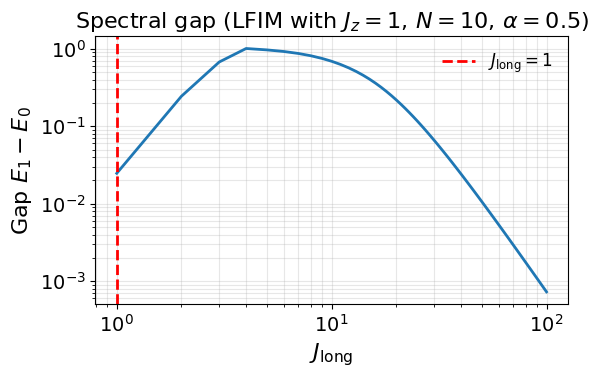

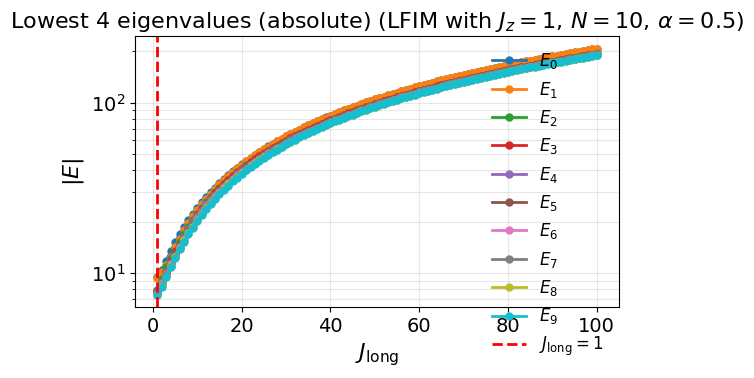

In [110]:
import matplotlib.pyplot as plt
import numpy as np

indices = range(1, 101)   # TFIM1Ham .. TFIM100Ham
gaps = []
spectra = []   # to store lowest eigenvalues

for idx in indices:
    gap, lowest_4 = compute_gap(idx, phys_N=10)
    gaps.append(gap)
    spectra.append(lowest_4)   # save the spectrum

parameter = np.array(indices) / 1
spectra = np.array(spectra)   # shape: (num_indices, 4)

plt.rcParams.update({
    "font.size": 14,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "legend.fontsize": 12,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "lines.linewidth": 2,
    "lines.markersize": 5,
})

# --- Plot gap (log-log) ---
plt.figure(figsize=(6,4))
plt.loglog(parameter, gaps, linestyle="-", color="C0",)
plt.axvline(x=1, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{long}}=1$")
plt.xlabel(r"$J_{\mathrm{long}}$")
plt.ylabel(r"Gap $E_1 - E_0$")
plt.title(r"Spectral gap (LFIM with $J_z=1, \, N=10, \, \alpha=0.5$)")
plt.legend(frameon=False, loc="best")
plt.grid(True, which="both", alpha=0.3)  # both major and minor grid
plt.tight_layout()
plt.show()

# --- Plot spectrum (lowest 4 levels, log-log, absolute value) ---
plt.figure(figsize=(6,4))
for i in range(spectra.shape[1]):
    plt.semilogy(parameter, np.abs(spectra[:, i]), linestyle="-", marker="o", label=rf"$E_{i}$")
plt.axvline(x=1, color="red", linestyle="--", linewidth=2, label=r"$J_{\mathrm{long}}=1$")
plt.xlabel(r"$J_{\mathrm{long}}$")
plt.ylabel(r"$|E|$")
plt.title(r"Lowest 4 eigenvalues (absolute) (LFIM with $J_z=1, \, N=10, \, \alpha=0.5$)")
plt.legend(frameon=False, loc="best")
plt.grid(True, which="both", alpha=0.3)
plt.tight_layout()
plt.show()

